In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

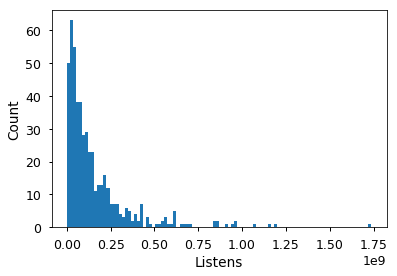

In [37]:
data = pd.read_csv('../samples/hip-hop_sample_lyrics.csv')
# plt.scatter(data['Count'], data['Diversity'])
plt.hist(data['Count'], bins=100)
# plt.xlim((0, 300))
plt.xlabel('Listens')
plt.ylabel('Count')
plt.show()

In [38]:
data.describe()

,Count
count,5.000000e+02
mean,1.561617e+08
std,1.969929e+08
min,1.049081e+06
25%,3.924378e+07
50%,9.337865e+07
75%,1.997372e+08
max,1.737133e+09


Our minimum and maximum is 9700000 and 1750000000 respectively. So, we can see if there is any patterns for more than a certain amount of play

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# filtering stop words
import re
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')

data['Lyrics'] = data['Lyrics'].apply(lambda x : x.lower())
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r'\d+','', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : ' '.join([word for word in re.split(r'[\W_]' ,x) if word not in stopwords_eng]))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"i'm",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"you",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"yeah",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"oh+",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"like",'', x))



In [40]:
def extract_features(df):
    vectorizer = CountVectorizer()
    results = vectorizer.fit_transform(df)
    print(vectorizer.get_feature_names())
    return results, vectorizer

counts, vectorizer = extract_features(data['Lyrics'])



['aaah', 'aaaow', 'aagh', 'aah', 'aames', 'aaron', 'aarp', 'ab', 'abandoned', 'abandonment', 'abc', 'abdomen', 'abel', 'abercrombie', 'abide', 'abilities', 'ability', 'able', 'abnormal', 'aboard', 'abolished', 'abomination', 'abortion', 'abortions', 'abouts', 'abracadabra', 'abroad', 'absent', 'absolute', 'absolutely', 'absorb', 'abstract', 'absurd', 'abuela', 'abundance', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abyss', 'ac', 'accelerants', 'accelerator', 'accent', 'accept', 'acceptance', 'accepted', 'access', 'accident', 'acclaimed', 'accolades', 'accomplice', 'accomplish', 'accomplished', 'accomplishments', 'account', 'accountant', 'accounts', 'accurately', 'ace', 'aces', 'ache', 'achieve', 'achieved', 'achieving', 'achoo', 'acid', 'acids', 'ack', 'ackavelie', 'acknowledge', 'acknowledged', 'acorns', 'acres', 'acronym', 'across', 'acrylic', 'act', 'actavis', 'acted', 'actin', 'acting', 'action', 'actions', 'activate', 'activated', 'active', 'activism', 'actor', 'actors', 

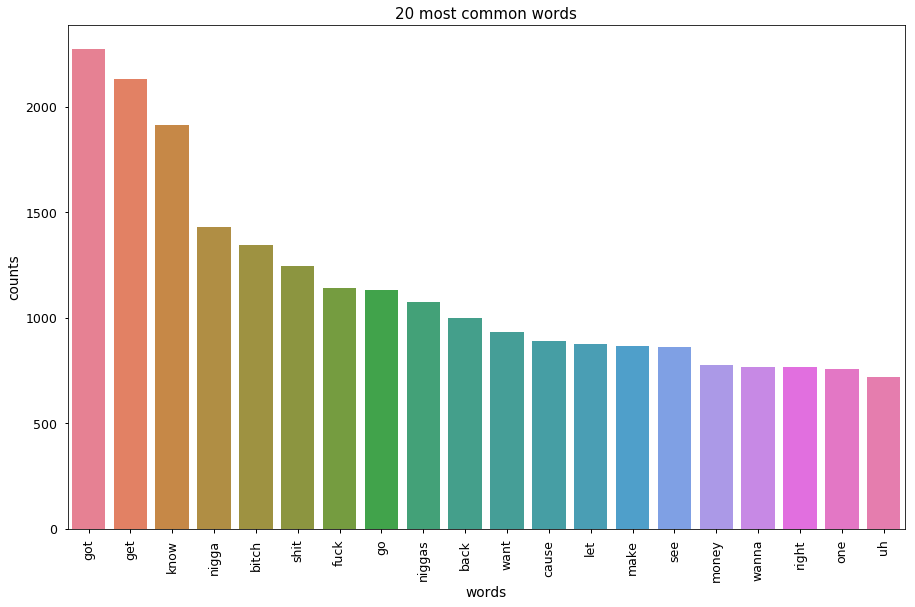

In [41]:
# Plot most common features
def plot_most_common(counts, vectorizer, number_words):
    import seaborn as sns
    words = vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in counts:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:number_words]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='{} most common words'.format(number_words))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
plot_most_common(counts, vectorizer, 20)

In [42]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 2
number_words = 20# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(counts)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)

c:\python3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
get know got shit niggas cause nigga one never back right see fuck make love em come let ya go

Topic #1:
got bitch get know nigga go fuck want shit ayy baby niggas back money let uh put make girl wanna
